In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
x=df.iloc[:,[3,4]].values

In [6]:
x.shape

(200, 2)

In [7]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [8]:
print(wcss)

[269981.28000000014, 181363.59595959607, 106348.37306211119, 73679.78903948837, 44448.45544793369, 37265.86520484345, 30259.657207285458, 25050.832307547524, 21862.09267218289, 19657.783608703947]


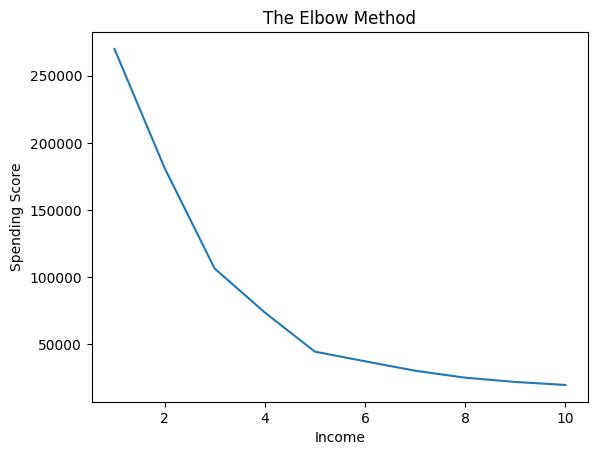

In [9]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

In [10]:
kmeans=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [11]:
print(y_kmeans)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [12]:
print(silhouette_score(x, y_kmeans))

0.553931997444648


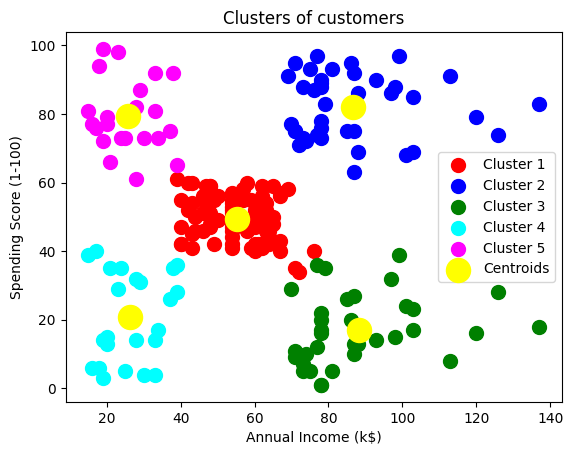

In [13]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [21]:
#Bonus
#DBSCAN
dbscan=DBSCAN(eps=5,min_samples=2)
dbscan.fit_predict(x)

array([ 0,  1,  2,  1,  0,  1,  2, -1,  2,  1,  3,  4,  3,  1,  3,  1,  5,
       -1, -1,  4,  5,  6, -1,  6,  7, -1,  5, -1,  5, -1,  8,  6,  8,  9,
        7, -1,  7,  6, 10,  6, 11,  9, 11, 12, 10, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 13, -1, 14, 15, 13, 16, 14, 16, 14, 15, 14, 16, 13,
       16, 14, 16, 14, 16, 13, 17, 13, 16, 13, 17, 14, 16, 13, 16, 13, 16,
       14, 16, 13, 16, 14, 16, 14, 17, 13, 16, 13, 18, 19, -1, 20, 18, -1,
       21, 19, 21, 20, 21, -1, 21, -1, -1, -1, -1, 22, -1, 22, -1, -1, 23,
       24, -1, -1, 23, 24, -1, -1, -1, -1, -1, -1, -1, -1])

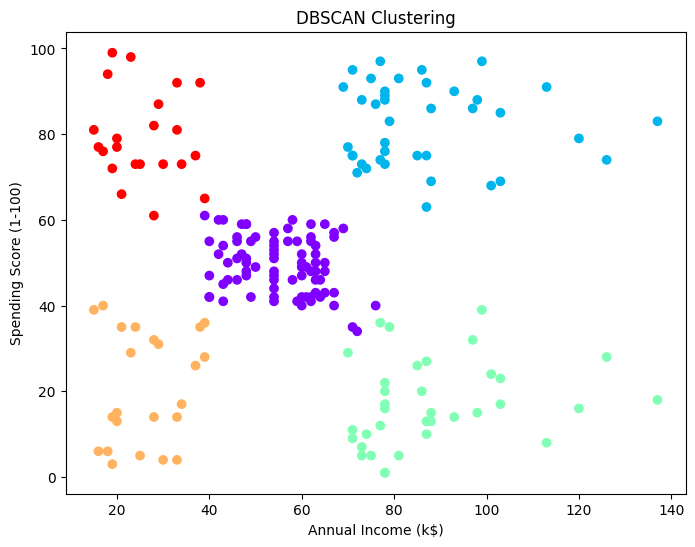

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.show()

In [25]:
print(silhouette_score(x, dbscan.labels_))

0.21005909857820562


In [20]:
#Analyze average spending per cluster
df['Cluster'] = kmeans.labels_
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print(avg_spending)

Cluster
0    49.518519
1    82.128205
2    17.114286
3    20.913043
4    79.363636
Name: Spending Score (1-100), dtype: float64


In [24]:
print(silhouette_score(x, kmeans.labels_))

0.553931997444648
